# Week-1

**Note to Learners**: 

- Click on "Copy to Drive", the button that appears just below the taskbar, to make a copy of this notebook in your drive. If you continue working with this notebook, changes **will not** be saved.


- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

We will be working with a subset of the [MNIST dataset](https://en.wikipedia.org/wiki/MNIST_database). Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [ ]:
##### DATASET GENERATION #####
import numpy as np
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X = X_train[y_train == 2][: 100].reshape(-1, 28 * 28)
test_image = X_test[y_test == 2][0].reshape(28 * 28)
##### DO NOT EDIT THIS CELL #####

## Problem-1

How many samples does the dataset have?

In [ ]:
X.shape[0]

100

## Problem-2

How many features does the dataset have?

In [ ]:
X.shape[1]

784

## Problem-3

Each sample corresponds to an image of dimension $28 \times 28$. Visualize one of these images using the `matplotlib` library. 

- You need to know how to reshape a feature vector. Refer to week-0 content for the same.
- You can refer to the following [document](https://matplotlib.org/stable/tutorials/introductory/images.html#sphx-glr-tutorials-introductory-images-py) for plotting NumPy arrays as images using `matplotlib`.

In [ ]:
import matplotlib.pyplot as plt 
%matplotlib inline
X[5].shape # lets take 5th image in matrix and see shape
# it is 784 dimension vector so we reshape

(784,)

In [ ]:
image = X[5].reshape(28,28)
image.shape

(28, 28)

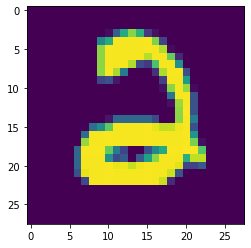

In [ ]:
plt.imshow(image)

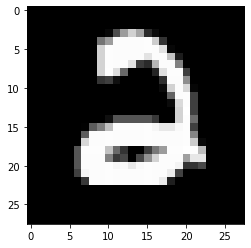

In [ ]:
plt.imshow(image, cmap='gray')

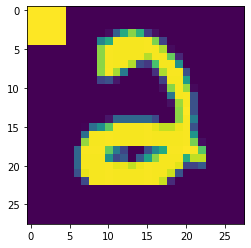

In [ ]:
image2 = image[0:5,0:5] = 255
plt.imshow(image)
# 255 means white and 0 means black

## Problem-4

Center the the dataset $\mathbf{X}$ around its mean. Call this centered dataset $\mathbf{X}^{\prime}$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n \cdot d} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{d} (X_{ij}^{\prime})^2}
$$

In [ ]:
# find the mean
# X is of shape n X d
# so, we have to calculate mean along axis 0
X_mean = X.mean(axis = 0)
X_prime = X - X_mean

In [ ]:
# Verify if centered data

X_prime.mean(axis = 0).sum() # very close to zero

-1.3353262939830308e-13

In [ ]:
n = X_prime.shape[0]
d = X_prime.shape[1]

numer = np.sqrt((X_prime ** 2).sum())
denom = n * d
ans = numer / denom

In [ ]:
ans

0.23298430527117953

## Problem-5

Compute the covariance matrix $\mathbf{C}$ of the centered dataset.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{d^2} \sqrt{\sum \limits_{i = 1}^{d} \sum \limits_{j = 1}^{d} C_{ij}^2}
$$

In [ ]:
# Check the shape
X_prime.shape

(100, 784)

In [ ]:
# Finding the covariance matrix
C = (X_prime.T @ X_prime) / X_prime.shape[0]
# C >> d x d
np.sqrt((C**2).sum())/ (C.shape[0] ** 2)

1.366129820401273

In [ ]:
C.shape

(784, 784)

## Problem-6

Compute the first and second principal components of the dataset, $\mathbf{w}_1$ and $\mathbf{w}_2$.

<u>Conversion</u>

Compute:
$$
\mathbf{w} = \mathbf{w}_1 + \mathbf{w}_2
$$

Enter the following quantity as your answer correct to two decimal places:

$$
\left| \sum \limits_{i = 1}^{d} w_i \right|
$$

In [ ]:
# We have C matrix with us
C.shape

# compute the eigen vectors of C

np.linalg.eigh?
eigval, eigvec = np.linalg.eigh(C)

In [ ]:
# First 10 eigen values in ascending order
eigval[:10]

array([-1.05665528e-10, -7.39787217e-11, -6.62007460e-11, -6.17415582e-11,
       -6.06143857e-11, -5.64198345e-11, -5.50871321e-11, -5.50632804e-11,
       -5.44286014e-11, -5.43659901e-11])

In [ ]:
# Last 10 eigenvalues
eigval[-10:]

array([ 81055.80788158,  94578.47274997,  96525.1215994 , 134866.65981127,
       141878.30832695, 167985.75081097, 210598.98987672, 237581.58319603,
       286280.09355663, 624014.72804358])

In [ ]:
# Take last 2 eigen vectors
w1, w2 = eigvec[:,-1], eigvec[:,-2]
# eigvec.sum()
# eigen vectors are arranged column wise

## Problem-7

Visualize the first principal component as an image.

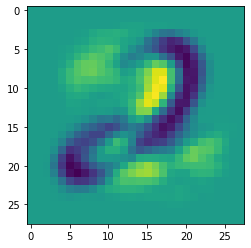

In [ ]:
image_w1  = w1.reshape(28,28)
plt.imshow(image_w1)

## Problem-8

Find the smallest value of $k$ for which the first $k$ principal components capture at least $95\%$ of the variance in the data.

In [ ]:
# eigen values contain the variance

vals = list(reversed(eigval))
vals[: 5] # sort in descending order

[624014.7280435808,
 286280.09355663095,
 237581.58319603014,
 210598.98987671547,
 167985.7508109714]

In [ ]:
# total variance in dataset:
sum(vals)

3336456.4299000013

In [ ]:
# variance in first k directions
# firstk = sum(vals[: k])

# total variance 
# total = sum(vals)

ratios = [sum(vals[: k])/ sum(vals) for k in range(1,len(vals))]
ratios[: 10] # first 10 has 62% variance

[0.18702918535108323,
 0.272832821505628,
 0.3440405798527528,
 0.40716113733685805,
 0.4575096895629713,
 0.500033340420658,
 0.5404554657038309,
 0.5693858964249938,
 0.5977328791406654,
 0.6220268597708912]

In [ ]:
ratios[:53] # captures 95%

[0.18702918535108323,
 0.272832821505628,
 0.3440405798527528,
 0.40716113733685805,
 0.4575096895629713,
 0.500033340420658,
 0.5404554657038309,
 0.5693858964249938,
 0.5977328791406654,
 0.6220268597708912,
 0.6445594127348089,
 0.6647575174263475,
 0.6825863872331185,
 0.6995434776659155,
 0.7151619854171261,
 0.7297248018414321,
 0.7435335683400951,
 0.756227612421684,
 0.7681665566855438,
 0.7792412821522916,
 0.790188378303195,
 0.7998839930324959,
 0.8090413779654263,
 0.8179615331866859,
 0.8261391130595901,
 0.8339772365270203,
 0.8415995328222654,
 0.8489114045469991,
 0.8558913029629927,
 0.862498943890877,
 0.8683648736077937,
 0.8740160028473881,
 0.8795685609688807,
 0.8849963658256413,
 0.8901375104525378,
 0.8948904173794329,
 0.8994140107482388,
 0.9037268369988093,
 0.9077668505768085,
 0.9116985291318486,
 0.9154667027047491,
 0.9191590598511977,
 0.9227072024904501,
 0.9261023651750432,
 0.9292654977321465,
 0.9323634382271876,
 0.9351938603802097,
 0.9379252599275

In [ ]:
for k, ratio in enumerate(ratios):
  if ratio >= 0.95:
    break
k + 1

53

## Problem-9

Given a `test_image`, visualize the proxies  by reconstructing it using the top $k$ principal components. Consider four values of $k$; values of $k$ for which the top-$k$ principal components explain:

- 20% of the variance
- 50% of the variance
- 80% of the variance
- 95% of the variance



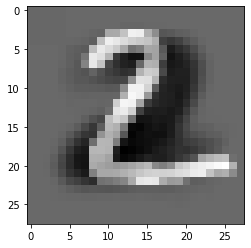

In [ ]:

mean_test_image = test_image - X.mean(axis = 0)
plt.imshow(mean_test_image.reshape(28,28), cmap = 'gray')

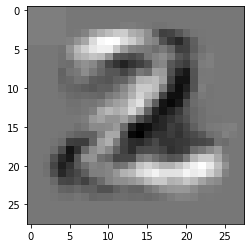

In [ ]:
# (X.T*w1)*w1
recon = np.zeros(784)
for i in range(20):
  recon += (mean_test_image @ eigvec[: , -1 - i] ) * eigvec[: , -1-i]

plt.imshow(recon.reshape(28,28), cmap = 'gray')

# EXTRAS:

In [ ]:
# What is dimension in numpy
X.ndim
# Dimension of matrix >> Shape of array in numpy
# vectors >> 1D NumPy array
# matrices >> 2D NumPy array

2

In [ ]:
# images >> 3D NumPy array
X_train.shape

# 60,000 images
# 28 x 28 

(60000, 28, 28)

In [ ]:
X_train[0][14][3]
# i.e. In the zeroth image of the dataset
# gives the pixel value of 14 th row and 3rd column


0

In [ ]:
# Reshape concept:

import numpy as np

Z = np.array([1,2,3,4,5,6])
Z.reshape(3,2)

# reshape is row wise and not column wise

array([[1, 2],
       [3, 4],
       [5, 6]])

In [ ]:
Z.reshape(2,3)

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
Z.reshape(2,-1)

array([[1, 2, 3],
       [4, 5, 6]])

In [ ]:
# mean along axis and column:

L = np.array([[1,2,3],[4,5,6],[7,8,9],[10,11,12],[13,14,15]])
L

array([[ 1,  2,  3],
       [ 4,  5,  6],
       [ 7,  8,  9],
       [10, 11, 12],
       [13, 14, 15]])

In [ ]:
L.mean(axis = 0)
# top to bottom

array([7., 8., 9.])

In [ ]:
L.mean(axis = 1)

array([ 2.,  5.,  8., 11., 14.])

In [ ]:
M = np.arange(15).reshape(5,3)
M

array([[ 0,  1,  2],
       [ 3,  4,  5],
       [ 6,  7,  8],
       [ 9, 10, 11],
       [12, 13, 14]])

In [ ]:
M[0]

array([0, 1, 2])

In [ ]:
M[:,0]

array([ 0,  3,  6,  9, 12])